In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [2]:
data_directory = "./train_test_split/"
image_size = (256, 256)  # Adjust to your desired image size
batch_size = 16  # Adjust as needed
# validation_split = 0.1  # 20% of the data for validation
# test_split = 0.1  # 10% of the data for testing


In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

train_dir = './train_test_split/train/'
test_dir = './train_test_split/test/'
val_dir = './train_test_split/valid/'


image_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical')

Found 2576 images belonging to 2 classes.
Found 240 images belonging to 2 classes.
Found 320 images belonging to 2 classes.


In [4]:
NUM_CLASSES = 2

# Fixed for Cats & Dogs color images
CHANNELS = 3

IMAGE_RESIZE = 256
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'softmax'
OBJECTIVE_FUNCTION = 'binary_crossentropy'

# Common accuracy metric for all outputs, but can use different metrics for different output
LOSS_METRICS = ['accuracy']

# EARLY_STOP_PATIENCE must be < NUM_EPOCHS
NUM_EPOCHS = 50
EARLY_STOP_PATIENCE = 10

STEPS_PER_EPOCH_TRAINING = 24
STEPS_PER_EPOCH_VALIDATION = 12

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# Using 1 to easily manage mapping between test_generator & prediction for submission preparation
BATCH_SIZE_TESTING = 1

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.layers import *
from keras.preprocessing import image
from tensorflow.keras import optimizers

sgd = optimizers.SGD(learning_rate = 0.001,  momentum = 0.9, nesterov = True)
model = keras.Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', input_shape=(224,224,3)))
model.add(Conv2D (128, (3,3), activation= 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout (0.1))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout (0.1))

model.add(Conv2D (128, (3,3), activation= 'relu'))
model.add(Conv2D (128, (3,3), activation= 'relu'))
model.add(Conv2D (128, (3,3), activation= 'relu'))
model.add(MaxPooling2D (pool_size=(2,2)))
model.add(Dropout (0.1))

model.add(Flatten())

model.add(Dense (128, activation='relu'))
model.add(Dropout (0.1))
model.add(Dense (128, activation='relu'))
model.add(Dropout (0.1))
model.add(Dense (2, activation='softmax'))

model.compile(loss="binary_crossentropy", optimizer=sgd, metrics=['accuracy'])



In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 128)     73856     
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 128)     0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 110, 110, 128)     0         
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 64)      36928     
                                                        

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'accuracy', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = r'./CNN.hdf5', monitor = 'accuracy', save_best_only = True, mode = 'auto')


fit_history = model.fit(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=val_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)

Epoch 1/50
24/24 [==============================] - 57s 2s/step - loss: 0.6934 - accuracy: 0.4870 - val_loss: 0.6932 - val_accuracy: 0.4844
Epoch 2/50


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


24/24 [==============================] - 95s 4s/step - loss: 0.6934 - accuracy: 0.4896 - val_loss: 0.6930 - val_accuracy: 0.5156
Epoch 3/50
24/24 [==============================] - 106s 4s/step - loss: 0.6932 - accuracy: 0.4896 - val_loss: 0.6931 - val_accuracy: 0.5156
Epoch 4/50
24/24 [==============================] - 105s 4s/step - loss: 0.6933 - accuracy: 0.4557 - val_loss: 0.6931 - val_accuracy: 0.5729
Epoch 5/50
24/24 [==============================] - 108s 4s/step - loss: 0.6930 - accuracy: 0.5078 - val_loss: 0.6931 - val_accuracy: 0.5729
Epoch 6/50
24/24 [==============================] - 107s 4s/step - loss: 0.6934 - accuracy: 0.4818 - val_loss: 0.6934 - val_accuracy: 0.4635
Epoch 7/50
24/24 [==============================] - 107s 4s/step - loss: 0.6933 - accuracy: 0.4922 - val_loss: 0.6932 - val_accuracy: 0.4688
Epoch 8/50
24/24 [==============================] - 109s 5s/step - loss: 0.6931 - accuracy: 0.5208 - val_loss: 0.6934 - val_accuracy: 0.4740
Epoch 9/50
24/24 [=======

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


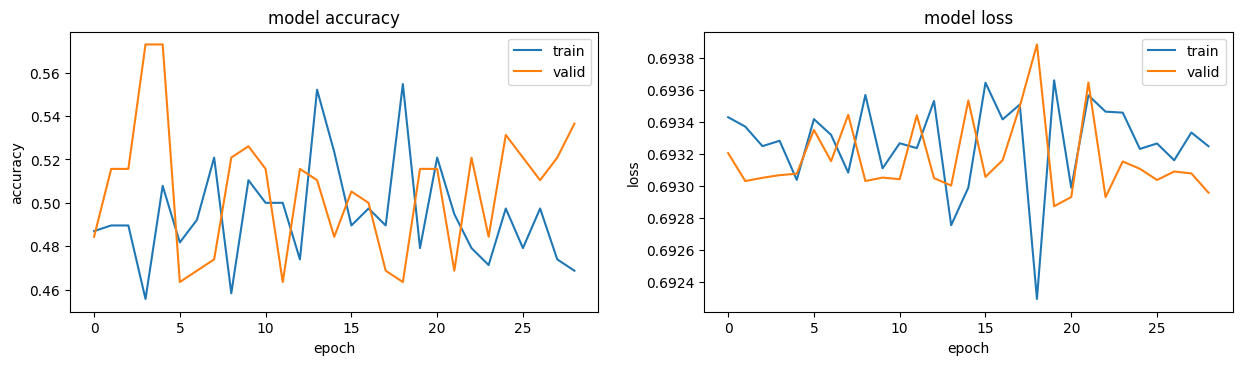

In [12]:
import matplotlib.pyplot as plt
print(fit_history.history.keys())

plt.figure(1, figsize = (15,8)) 

plt.subplot(221)  
plt.plot(fit_history.history['accuracy'])  
plt.plot(fit_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.figure(1, figsize = (15,8)) 
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [13]:
# test_generator = data_generator.flow_from_directory(
#     directory = r"/workspace/test",
#     target_size = (image_size, image_size),
#     batch_size = BATCH_SIZE_TESTING,
#     class_mode = None,
#     shuffle = False,
#     seed = 123
# )

# test_generator.reset()

pred = model.predict(test_generator, steps = len(test_generator), verbose = 1)

predicted_class_indices = np.argmax(pred, axis = 1)

15/15 [==============================] - 4s 270ms/step


In [14]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())

res_preds = model.predict(test_generator)
res_pred_classes = np.argmax(res_preds, axis=1)

15/15 [==============================] - 4s 280ms/step


In [17]:
from sklearn.metrics import accuracy_score

res_acc = accuracy_score(true_classes, res_pred_classes)
print("ResNet50 Model Accuracy with Fine-Tuning: {}%".format(res_acc))

ResNet50 Model Accuracy with Fine-Tuning: 0.5%
